D:\Anaconda\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

D:\Anaconda\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\JYOTHSNA V\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Enter your query: What happens if the data gets breached?

📄 GDPR_EU.pdf
Relevance Score: 0.585
Context:
5. The controller shall document any personal data breac hes, compr ising the facts relating to the personal data 
breac h, its effects and the remedial action taken. That documentation shall enable the super visor y author ity to verify 
compl iance with this Article. Article 34 
Communication of a personal data breach to the data subject 
1. When the personal data breac h is likely to result in a high risk to the rights and freedoms of natural persons, the 
controller shall communicate the personal data breac h to the data subject without undue dela y. 4.5.2016 L 119/52 Official Jour nal of the European Union EN     2. The communication to the data subject refer red to in paragraph 1 of this Article shall descr ibe in clear and plain 
languag e the nature of the personal data breach and contain at least the information and measures refer red to in 
points (b), (c) and (d) of Artic

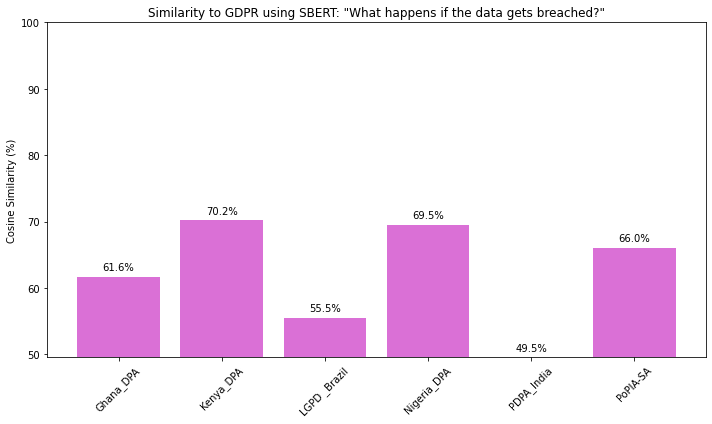

In [2]:
from sentence_transformers import SentenceTransformer, util
import PyPDF2, os, matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

def pdf_to_text(path):
    text = ""
    with open(path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            t = page.extract_text()
            if t:
                text += t
    return text

def semantic_search(folder_path, user_query):
    query_vec = sbert_model.encode(user_query, convert_to_tensor=True)
    results, contexts = {}, {}

    for file in os.listdir(folder_path):
        if file.endswith(".pdf"):
            text = pdf_to_text(os.path.join(folder_path, file))
            sentences = sent_tokenize(text)
            if not sentences: continue
            sent_vecs = sbert_model.encode(sentences, convert_to_tensor=True)
            scores = util.cos_sim(query_vec, sent_vecs)[0]
            idx = scores.argmax().item()
            best_score = scores[idx].item()
            context = " ".join(sentences[max(0, idx-3): min(len(sentences), idx+4)])
            results[file] = round(best_score, 3)
            contexts[file] = context
    return results, contexts

def compare_to_gdpr(results, contexts):
    sim_scores = {}
    gdpr_file = next((f for f in results if "gdpr" in f.lower()), None)
    if not gdpr_file: return None, {}

    gdpr_vec = sbert_model.encode(contexts[gdpr_file], convert_to_tensor=True)
    for f, ctx in contexts.items():
        if f == gdpr_file:
            sim_scores[f] = 1.0
        else:
            vec = sbert_model.encode(ctx, convert_to_tensor=True)
            sim_scores[f] = util.cos_sim(gdpr_vec, vec).item()
    return gdpr_file, sim_scores

def plot_similarity(sim_scores, query, gdpr_file):
    labels, values = [], []
    for f, score in sim_scores.items():
        if f != gdpr_file:
            labels.append(f.replace(".pdf", ""))
            values.append(round(score * 100, 2))
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='orchid')
    plt.title(f"Similarity to GDPR using SBERT: \"{query}\"")
    plt.ylabel("Cosine Similarity (%)")
    plt.ylim(30, 100)
    for bar in bars:
        y = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, y + 1, f"{y:.1f}%", ha='center')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# === USAGE ===
folder = r"D:\Project_Apr_2025\Global South"
query = input("Enter your query: ")
results, contexts = semantic_search(folder, query)
gdpr_file, sim_scores = compare_to_gdpr(results, contexts)

for f in results:
    print(f"\n📄 {f}\nRelevance Score: {results[f]}\nContext:\n{contexts[f]}\n")

if gdpr_file:
    plot_similarity(sim_scores, query, gdpr_file)
else:
    print("⚠️ GDPR file not found.")


(30.0, 80.0)

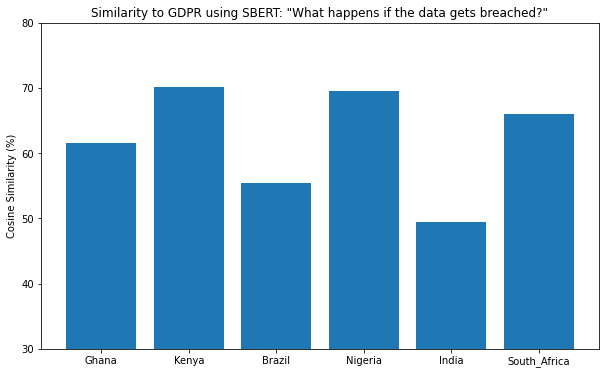

In [7]:
#plot for wha happens if the data gets breached
from matplotlib import pyplot as plt
Y = [61.6,70.2,55.5,69.5,49.5,66.0]
X = ['Ghana','Kenya','Brazil','Nigeria','India','South_Africa']
plt.figure(figsize=(10, 6))
plt.bar(X,Y)
plt.title(f"Similarity to GDPR using SBERT: \"{query}\"")
plt.ylabel("Cosine Similarity (%)")
plt.ylim(30, 80)

[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your search query: The impact of cross-border or foreign influence on data extraction.
File: GDPR_EU.pdf
Relevance Score (GloVe cosine similarity): 0.9473
Context:
(4)  The processing of personal data should be designed to serve mankind. The right to the prote ction of personal 
data is not an absolute right ; it must be considered in relation to its function in society and be balanced against 
other fundamental rights, in accordance with the principle of propor tionality . This Regulation respects all 
fundamental rights and obser ves the freedoms and principles recognised in the Char ter as enshr ined in the 
Treaties, in particular the respect for private and family life, home and communications, the protection of 
personal data, freedom of thought, conscience and religion, freedom of expression and information, freedom to 
conduct a business, the right to an effective remedy and to a fair trial, and cultural, religious and linguistic 
diversity . (5)  The economic and social 

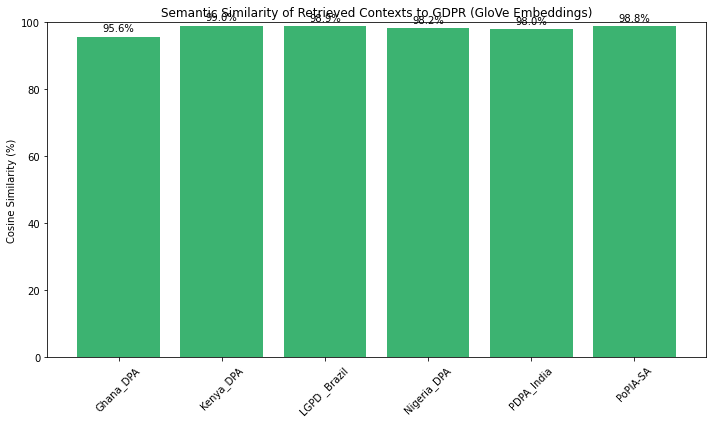

In [2]:
import os
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sentence_transformers import SentenceTransformer, util

nltk.download('punkt')

# Load models
glove_path = "glove.6B.100d.word2vec.txt"
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

def pdf_to_text(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def sentence_vector_glove(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [w for w in words if w in glove_model]
    if not valid_words:
        return np.zeros((glove_model.vector_size,))
    return np.mean([glove_model[w] for w in valid_words], axis=0)

def semantic_search_sbert(folder_path, user_query):
    query_vec = sbert_model.encode(user_query, convert_to_tensor=True)
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            sentences = sent_tokenize(text)
            if not sentences:
                continue

            sent_vecs = sbert_model.encode(sentences, convert_to_tensor=True)
            scores = util.cos_sim(query_vec, sent_vecs)[0]
            best_idx = scores.argmax().item()
            start = max(0, best_idx - 3)
            end = min(len(sentences), best_idx + 4)
            context = " ".join(sentences[start:end])

            results[filename] = context

    return results

def compare_context_with_query_glove(contexts, user_query):
    query_vec = sentence_vector_glove(user_query)
    sim_scores = {}

    for filename, context in contexts.items():
        context_vec = sentence_vector_glove(context)
        if np.linalg.norm(query_vec) == 0 or np.linalg.norm(context_vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([query_vec], [context_vec])[0][0]
        sim_scores[filename] = sim

    return sim_scores

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts):
    # Find GDPR file (case-insensitive)
    gdpr_file = next((f for f in relevance_scores if "gdpr" in f.lower()), None)
    if not gdpr_file:
        print("⚠️ GDPR file not found.")
        return
    
    # Get glove vector for GDPR context
    def glove_vector(text):
        words = word_tokenize(text.lower())
        valid_words = [w for w in words if w in glove_model]
        if not valid_words:
            return np.zeros((glove_model.vector_size,))
        return np.mean([glove_model[w] for w in valid_words], axis=0)
    
    gdpr_vec = glove_vector(retrieved_contexts[gdpr_file])
    
    similarities = {}
    for f, ctx in retrieved_contexts.items():
        vec = glove_vector(ctx)
        if np.linalg.norm(gdpr_vec) == 0 or np.linalg.norm(vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([gdpr_vec], [vec])[0][0]
        similarities[f] = sim

    # Prepare plot data (exclude GDPR itself)
    labels = []
    values = []
    for f, sim in similarities.items():
        if f != gdpr_file:
            labels.append(f.replace(".pdf", ""))
            values.append(round(sim * 100, 2))
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='mediumseagreen')
    plt.title("Semantic Similarity of Retrieved Contexts to GDPR (GloVe Embeddings)")
    plt.ylabel("Cosine Similarity (%)")
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()




# === USAGE ===
if __name__ == "__main__":
    folder = r"D:\Project_Apr_2025\Global South"
    user_query = input("Enter your search query: ").strip()

    # Retrieve contexts using SBERT
    retrieved_contexts = semantic_search_sbert(folder, user_query)

    # Compare each context's relevance to query using GloVe cosine similarity
    relevance_scores = compare_context_with_query_glove(retrieved_contexts, user_query)

    for file, score in relevance_scores.items():
        print(f"File: {file}")
        print(f"Relevance Score (GloVe cosine similarity): {score:.4f}")
        print(f"Context:\n{retrieved_contexts[file]}\n")
    
    plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts)


[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your search query:  In the event of a data breach, what are the potential consequences for individuals and organizations if sensitive personal data is exposed?
File: GDPR_EU.pdf
Relevance Score (GloVe cosine similarity): 0.9795
Context:
Each controller and processor should be obliged to cooperat e with 
the super visor y author ity and make those records, on request, available to it, so that it might serve for 
monitoring those processing operations. (83)  In order to maintain secur ity and to prevent processing in infringement of this Regulation, the controller or 
processor should evaluate the risks inherent in the processing and implement measures to mitig ate those risks, 
such as encr yption. Those measures should ensure an appropr iate level of secur ity, including confidentiality , 
taking into account the state of the art and the costs of implementation in relation to the risks and the nature of 
the personal data to be prot ected. In assessing data secur ity risk, consid

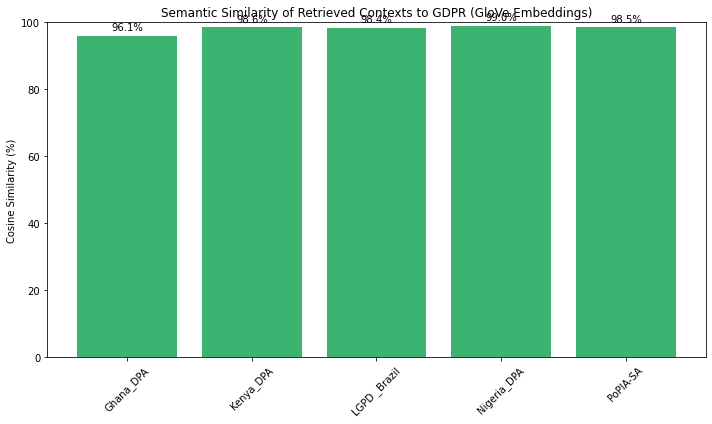

In [2]:
import os
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sentence_transformers import SentenceTransformer, util

nltk.download('punkt')

# Load models
glove_path = "glove.6B.100d.word2vec.txt"
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

def pdf_to_text(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def sentence_vector_glove(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [w for w in words if w in glove_model]
    if not valid_words:
        return np.zeros((glove_model.vector_size,))
    return np.mean([glove_model[w] for w in valid_words], axis=0)

def semantic_search_sbert(folder_path, user_query):
    query_vec = sbert_model.encode(user_query, convert_to_tensor=True)
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            sentences = sent_tokenize(text)
            if not sentences:
                continue

            sent_vecs = sbert_model.encode(sentences, convert_to_tensor=True)
            scores = util.cos_sim(query_vec, sent_vecs)[0]
            best_idx = scores.argmax().item()
            start = max(0, best_idx - 3)
            end = min(len(sentences), best_idx + 4)
            context = " ".join(sentences[start:end])

            results[filename] = context

    return results

def compare_context_with_query_glove(contexts, user_query):
    query_vec = sentence_vector_glove(user_query)
    sim_scores = {}

    for filename, context in contexts.items():
        context_vec = sentence_vector_glove(context)
        if np.linalg.norm(query_vec) == 0 or np.linalg.norm(context_vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([query_vec], [context_vec])[0][0]
        sim_scores[filename] = sim

    return sim_scores

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts):
    # Find GDPR file (case-insensitive)
    gdpr_file = next((f for f in relevance_scores if "gdpr" in f.lower()), None)
    if not gdpr_file:
        print("⚠️ GDPR file not found.")
        return
    
    # Get glove vector for GDPR context
    def glove_vector(text):
        words = word_tokenize(text.lower())
        valid_words = [w for w in words if w in glove_model]
        if not valid_words:
            return np.zeros((glove_model.vector_size,))
        return np.mean([glove_model[w] for w in valid_words], axis=0)
    
    gdpr_vec = glove_vector(retrieved_contexts[gdpr_file])
    
    similarities = {}
    for f, ctx in retrieved_contexts.items():
        vec = glove_vector(ctx)
        if np.linalg.norm(gdpr_vec) == 0 or np.linalg.norm(vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([gdpr_vec], [vec])[0][0]
        similarities[f] = sim

    # Prepare plot data (exclude GDPR itself)
    labels = []
    values = []
    for f, sim in similarities.items():
        if f != gdpr_file:
            labels.append(f.replace(".pdf", ""))
            values.append(round(sim * 100, 2))
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='mediumseagreen')
    #plt.title("Semantic Similarity of Retrieved Contexts to GDPR (GloVe Embeddings)")
    plt.ylabel("Cosine Similarity (%)")
    plt.ylim(80, 100)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()




# === USAGE ===
if __name__ == "__main__":
    folder = r"D:\Project_Apr_2025\Global South"
    user_query = input("Enter your search query: ").strip()

    # Retrieve contexts using SBERT
    retrieved_contexts = semantic_search_sbert(folder, user_query)

    # Compare each context's relevance to query using GloVe cosine similarity
    relevance_scores = compare_context_with_query_glove(retrieved_contexts, user_query)

    for file, score in relevance_scores.items():
        print(f"File: {file}")
        print(f"Relevance Score (GloVe cosine similarity): {score:.4f}")
        print(f"Context:\n{retrieved_contexts[file]}\n")
    
    plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts)

   

[nltk_data] Downloading package punkt to C:\Users\JYOTHSNA
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your search query: What legal and organizational actions are taken when data protection regulations are violated?
File: GDPR_EU.pdf
Relevance Score (GloVe cosine similarity): 0.9350
Context:
The data prote ction officer may fulfil other tasks and duties. The controller or processor shall ensure that any such 
tasks and duties do not result in a conf lict of interests. Article 39 
Tasks of the data protection officer 
1. The data protection officer shall have at least the following tasks: 
(a)  to inform and advise the controller or the processor and the employees who carry out processing of their 
oblig ations pursuant to this Regulation and to other Union or Member State data prote ction provisions; 
(b)  to monitor compliance with this Regulation, with other Union or Member State data prote ction provisions and with 
the policies of the controller or processor in relation to the prote ction of personal data, including the assignment of 
responsibilities, awareness-raising and t

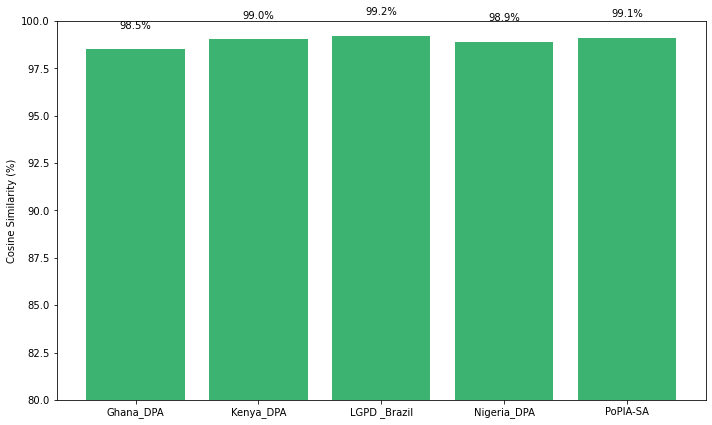

In [3]:
import os
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sentence_transformers import SentenceTransformer, util

nltk.download('punkt')

# Load models
glove_path = "glove.6B.100d.word2vec.txt"
glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

def pdf_to_text(file_path):
    text = ""
    with open(file_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def sentence_vector_glove(sentence):
    words = word_tokenize(sentence.lower())
    valid_words = [w for w in words if w in glove_model]
    if not valid_words:
        return np.zeros((glove_model.vector_size,))
    return np.mean([glove_model[w] for w in valid_words], axis=0)

def semantic_search_sbert(folder_path, user_query):
    query_vec = sbert_model.encode(user_query, convert_to_tensor=True)
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            text = pdf_to_text(file_path)
            sentences = sent_tokenize(text)
            if not sentences:
                continue

            sent_vecs = sbert_model.encode(sentences, convert_to_tensor=True)
            scores = util.cos_sim(query_vec, sent_vecs)[0]
            best_idx = scores.argmax().item()
            start = max(0, best_idx - 3)
            end = min(len(sentences), best_idx + 4)
            context = " ".join(sentences[start:end])

            results[filename] = context

    return results

def compare_context_with_query_glove(contexts, user_query):
    query_vec = sentence_vector_glove(user_query)
    sim_scores = {}

    for filename, context in contexts.items():
        context_vec = sentence_vector_glove(context)
        if np.linalg.norm(query_vec) == 0 or np.linalg.norm(context_vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([query_vec], [context_vec])[0][0]
        sim_scores[filename] = sim

    return sim_scores

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts):
    # Find GDPR file (case-insensitive)
    gdpr_file = next((f for f in relevance_scores if "gdpr" in f.lower()), None)
    if not gdpr_file:
        print("⚠️ GDPR file not found.")
        return
    
    # Get glove vector for GDPR context
    def glove_vector(text):
        words = word_tokenize(text.lower())
        valid_words = [w for w in words if w in glove_model]
        if not valid_words:
            return np.zeros((glove_model.vector_size,))
        return np.mean([glove_model[w] for w in valid_words], axis=0)
    
    gdpr_vec = glove_vector(retrieved_contexts[gdpr_file])
    
    similarities = {}
    for f, ctx in retrieved_contexts.items():
        vec = glove_vector(ctx)
        if np.linalg.norm(gdpr_vec) == 0 or np.linalg.norm(vec) == 0:
            sim = 0.0
        else:
            sim = cosine_similarity([gdpr_vec], [vec])[0][0]
        similarities[f] = sim

    # Prepare plot data (exclude GDPR itself)
    labels = []
    values = []
    for f, sim in similarities.items():
        if f != gdpr_file:
            labels.append(f.replace(".pdf", ""))
            values.append(round(sim * 100, 2))
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='mediumseagreen')
    #plt.title("Semantic Similarity of Retrieved Contexts to GDPR (GloVe Embeddings)")
    plt.ylabel("Cosine Similarity (%)")
    plt.ylim(80, 100)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()




# === USAGE ===
if __name__ == "__main__":
    folder = r"D:\Project_Apr_2025\Global South"
    user_query = input("Enter your search query: ").strip()

    # Retrieve contexts using SBERT
    retrieved_contexts = semantic_search_sbert(folder, user_query)

    # Compare each context's relevance to query using GloVe cosine similarity
    relevance_scores = compare_context_with_query_glove(retrieved_contexts, user_query)

    for file, score in relevance_scores.items():
        print(f"File: {file}")
        print(f"Relevance Score (GloVe cosine similarity): {score:.4f}")
        print(f"Context:\n{retrieved_contexts[file]}\n")
    
    plot_relevance_vs_gdpr(relevance_scores, retrieved_contexts)

  